# Problem 1 : Data Pre-Processing (Categorical data)

In [2]:
# Q1. Problem Statement: Data Pre-Processing (Categorical data)

# You are given a dataset – “hotel_bookings.csv.” The dataset has a high number of null and elements that need to be cleansed; Your job is to create a separate DataFrame with only categorical columns and perform the following operations:

# Find the number of null values in each column of the new DataFrame

# Replace the null values with mode

# In the "hotel" column, replace the hotel names with "0" and "1" based on the condition that – if, "hotel" = "city_hotel", then "hotel" = "1"; else, "0"

# Using the label encoder, assign a unique country code to each country

# Using onehot encoder, encode the “month” column



In [3]:
import pandas as pd

data = pd.read_csv("hotel_bookings.csv")
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data # filter out non categorical data

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


In [5]:
# find the number of null values in each column
null_counts = categorical_data.isnull().sum()
null_counts

hotel                        0
arrival_date_month           0
meal                         0
country                    488
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [9]:
# replace null values with mode
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit_transform(categorical_data)

array([['Resort Hotel', 'July', 'BB', ..., 'Transient', 'Check-Out',
        '2015-07-01'],
       ['Resort Hotel', 'July', 'BB', ..., 'Transient', 'Check-Out',
        '2015-07-01'],
       ['Resort Hotel', 'July', 'BB', ..., 'Transient', 'Check-Out',
        '2015-07-02'],
       ...,
       ['City Hotel', 'August', 'BB', ..., 'Transient', 'Check-Out',
        '2017-09-07'],
       ['City Hotel', 'August', 'BB', ..., 'Transient', 'Check-Out',
        '2017-09-07'],
       ['City Hotel', 'August', 'HB', ..., 'Transient', 'Check-Out',
        '2017-09-07']], dtype=object)

In [10]:
categorical_data_imputed = pd.DataFrame(imputer.fit_transform(categorical_data), columns=categorical_data.columns)

In [11]:
categorical_data_imputed

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


In [12]:
# Replace hotel names with 0 and 1
categorical_data_imputed["hotel"] = categorical_data_imputed["hotel"].apply(lambda x: 1 if x == "City Hotel" else 0)
categorical_data_imputed

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,0,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,0,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,0,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,0,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,0,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,1,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,1,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,1,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


In [13]:
# Assign unique country code to each country using label encoder
label_encoder = LabelEncoder()
categorical_data_imputed["country_code"] = label_encoder.fit_transform(categorical_data_imputed["country"])


In [14]:
categorical_data_imputed

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,country_code
0,0,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,135
1,0,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,135
2,0,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02,59
3,0,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02,59
4,0,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06,15
119386,1,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07,56
119387,1,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07,43
119388,1,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07,59


In [50]:
onehot_encoder = OneHotEncoder(sparse_output=False)

month_encoded = onehot_encoder.fit_transform(categorical_data_imputed[["arrival_date_month"]])
month_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [55]:
onehot_encoder.categories_
# month_encoded_df = pd.DataFrame(month_encoded, columns=onehot_encoder.get_feature_names_out(["month"]))


[array(['April', 'August', 'December', 'February', 'January', 'July',
        'June', 'March', 'May', 'November', 'October', 'September'],
       dtype=object)]

In [56]:
categories = onehot_encoder.categories_[0]
categories

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [60]:
column_names = [category for category in categories]

In [61]:
column_names

['April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

In [62]:
month_encoded_df = pd.DataFrame(month_encoded, columns=column_names)

In [63]:
month_encoded_df

,April,August,December,February,January,July,June,March,May,November,October,September
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119386,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119387,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119388,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
categorical_data_final = pd.concat([categorical_data_imputed.drop(columns=["arrival_date_month"]), month_encoded_df], axis=1)

In [65]:
categorical_data_final

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,...,December,February,January,July,June,March,May,November,October,September
0,0,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119386,1,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119387,1,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119388,1,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Problem 2 : Data Pre-Processing (Exponential data)

In [67]:
# Q2. Problem Statement: Data Pre-Processing (Exponential data)

# Create a DataFrame to store exponential data using the NumPy np.random.exponential() (size=1000) function, and perform the following operations:

# Using the minmax_scaling() function, scale the data between 0 to 1, and plot the original data and scaled data using the Seaborn library

# Using preprocessing.normalize() function, normalize the data, and plot the original data and normalized data using the Seaborn library

In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale, normalize

# generate exponential data
np.random.seed(30)
exponential_data = np.random.exponential(size=1000)
exponential_data

array([1.03322782e+00, 4.79243772e-01, 1.08781451e+00, 1.78708961e-01,
       3.28629352e+00, 4.25660428e-01, 4.79766236e+00, 2.67955129e-01,
       8.81151096e-01, 5.22038422e-01, 1.46453753e-01, 7.85561391e-01,
       7.30177097e-01, 1.45609516e+00, 2.71583255e+00, 9.39847796e-02,
       2.17871544e-01, 5.14880904e+00, 2.68115418e-01, 2.73104013e-01,
       9.91822338e-01, 1.32784651e+00, 1.16585649e+00, 3.16256075e-02,
       2.32804489e+00, 3.37482206e-01, 8.11058493e-01, 4.72278606e-01,
       2.69852125e-02, 6.81513360e-01, 1.80008459e+00, 4.57264841e-01,
       7.24394559e-01, 6.39377294e-01, 4.88008083e-01, 1.36311315e+00,
       4.08332334e-01, 9.04950991e-01, 3.79992383e-01, 4.25030912e-01,
       2.80814784e-01, 1.19716326e+00, 2.38359772e-01, 3.11009614e-01,
       4.68235719e-01, 8.51178563e-01, 2.49323821e+00, 1.70912531e+00,
       1.78147352e-01, 2.44512808e-02, 1.53550751e+00, 3.07690756e-01,
       4.14556898e-01, 1.68399760e+00, 1.64742391e+00, 6.80352654e-01,
      

In [69]:
# scale the data between 0 and 1
scaled_data = minmax_scale(exponential_data)
scaled_data

array([1.50411392e-01, 6.95183394e-02, 1.58382170e-01, 2.56340826e-02,
       4.79405273e-01, 6.16940704e-02, 7.00096175e-01, 3.86658566e-02,
       1.28205066e-01, 7.57672376e-02, 2.09241595e-02, 1.14247005e-01,
       1.06159760e-01, 2.12158711e-01, 3.96106252e-01, 1.32626114e-02,
       3.13526243e-02, 7.51370804e-01, 3.86892621e-02, 3.94176995e-02,
       1.44365341e-01, 1.93431774e-01, 1.69777903e-01, 4.15689115e-03,
       3.39481287e-01, 4.88182383e-02, 1.17970106e-01, 6.85012822e-02,
       3.47929814e-03, 9.90538549e-02, 2.62388235e-01, 6.63089640e-02,
       1.05315391e-01, 9.29011236e-02, 7.07981089e-02, 1.98581428e-01,
       5.91638127e-02, 1.31680340e-01, 5.50255976e-02, 6.16021481e-02,
       4.05436305e-02, 1.74349334e-01, 3.43443266e-02, 4.49526960e-02,
       6.79109375e-02, 1.23828460e-01, 3.63602904e-01, 2.49106312e-01,
       2.55520761e-02, 3.10929206e-03, 2.23754546e-01, 4.44680746e-02,
       6.00727269e-02, 2.45437150e-01, 2.40096640e-01, 9.88843680e-02,
      

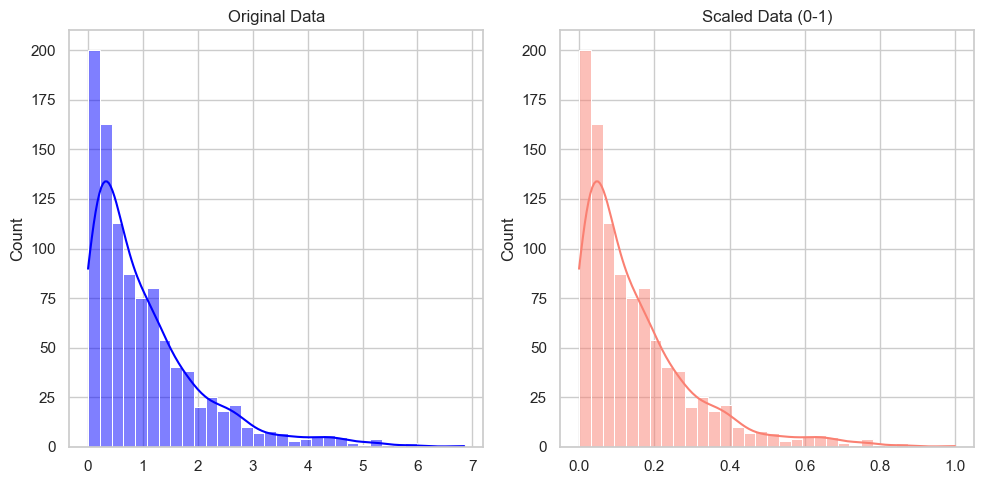

In [71]:
# Plot original data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(exponential_data, kde=True, color="blue")
plt.title("Original Data")
# plot scaled data
plt.subplot(1, 2, 2)
sns.histplot(scaled_data, kde=True, color="salmon")
plt.title("Scaled Data (0-1)")

plt.tight_layout()
plt.show()


In [72]:
# normalize the data
normalized_data = normalize(exponential_data.reshape(1, -1))
normalized_data

array([[2.23152986e-02, 1.03505419e-02, 2.34942431e-02, 3.85969459e-03,
        7.09762354e-02, 9.19326730e-03, 1.03618259e-01, 5.78720256e-03,
        1.90307978e-02, 1.12748060e-02, 3.16305771e-03, 1.69662843e-02,
        1.57701134e-02, 3.14482416e-02, 5.86556160e-02, 2.02985089e-03,
        4.70551455e-03, 1.11202204e-01, 5.79066443e-03, 5.89840640e-03,
        2.14210372e-02, 2.86783716e-02, 2.51797669e-02, 6.83038976e-04,
        5.02803117e-02, 7.28882442e-03, 1.75169619e-02, 1.02001107e-02,
        5.82817324e-04, 1.47190908e-02, 3.88776069e-02, 9.87584853e-03,
        1.56452242e-02, 1.38090505e-02, 1.05398305e-02, 2.94400483e-02,
        8.81902110e-03, 1.95448198e-02, 8.20694460e-03, 9.17967123e-03,
        6.06494098e-03, 2.58559197e-02, 5.14801225e-03, 6.71707851e-03,
        1.01127938e-02, 1.83834614e-02, 5.38480999e-02, 3.69130997e-02,
        3.84756514e-03, 5.28090340e-04, 3.31633623e-02, 6.64539897e-03,
        8.95345708e-03, 3.63704001e-02, 3.55804941e-02, 1.469402

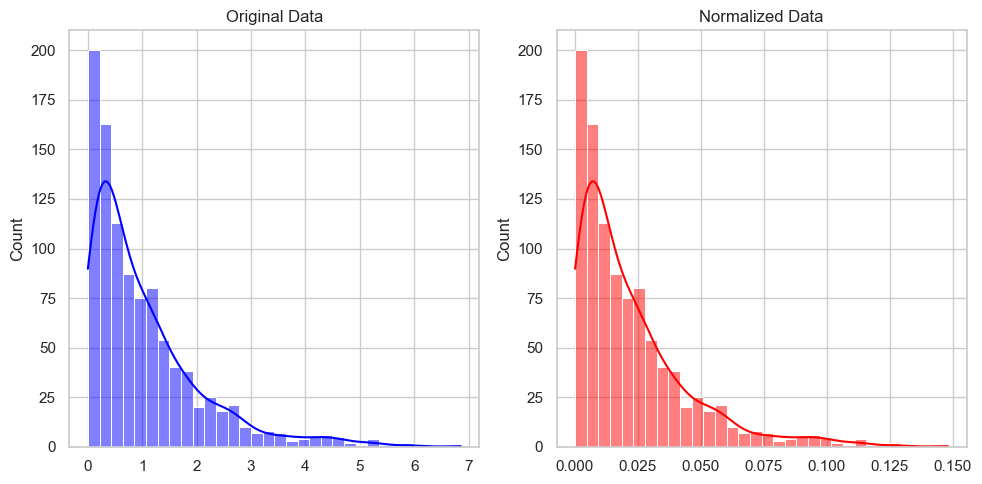

In [73]:
# Plot original data and normalized data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(exponential_data, kde=True, color="blue")
plt.title("Original Data")

plt.subplot(1, 2, 2)
sns.histplot(normalized_data.flatten(), kde=True, color="red")
plt.title("Normalized Data")

plt.tight_layout()
plt.show()